In [25]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from scipy.stats import truncnorm



Creates an automatic table with a number of useful summary stastics

In [27]:
def sumData(data):
    #Create generic table with columns with the same column names as dataset
    table=pd.DataFrame(columns=data.columns)
    #Create row names for the table 
    table_rows=pd.Series(['DataType','ZeroVals','NullVals','Dupes','MinVal','MaxVal','AvgVal','StandDev','MedianVal','Quantile1','Quantile2','Quantile3','Quantile4'])
    #Create variables to contain values
    DtypeVal,ZeroVals,NullVals,DupeBool,MinVal,MaxVal,AvgVal,StandDev,MedianVal,Quantile25,Quantile50,Quantile75,Quantile90=[],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in data.columns: 
        DtypeVal.append(np.dtype(data[i]))
        NullVals.append(data[i].isnull().sum())
        DupeBool.append(pd.Series(sum(pd.Series(data[i].duplicated()))).item())
        ZeroVals.append((data[i]==0).sum())
        MinVal.append((data[i].min()))
        MaxVal.append((data[i].max()))
        if np.dtype(data[i]) == 'int' or np.dtype(data[i]) == 'float':
            AvgVal.append((data[i].mean()))
            StandDev.append((data[i].mean()))
            MedianVal.append((data[i].median())) 
            Quantile25.append((data[i].quantile(.25)))     
            Quantile50.append((data[i].quantile(.5)))     
            Quantile75.append((data[i].quantile(.75)))     
            Quantile90.append((data[i].quantile(.9)))     
        else:          
            AvgVal.append('invalid')
            StandDev.append('invalid')
            MedianVal.append('invalid')  
            Quantile25.append('invalid') 
            Quantile50.append('invalid')     
            Quantile75.append('invalid')     
            Quantile90.append('invalid')  

    table=table.append(pd.Series(DtypeVal, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(ZeroVals, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(NullVals, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(DupeBool, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MinVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MaxVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MedianVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(AvgVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(StandDev, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile25, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile50, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile75, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile90, index=data.columns),ignore_index=True)

    table.insert(loc=0, column='Estimates', value=table_rows)
    table.to_csv('sumTable.csv', sep=',')
    return table

Return the most common element from a list. Can be both numerical and non-numeric.

In [10]:
def maxModeList(ValueList):
    value=max(zip((list(ValueList).count(item) for item in set(list(ValueList))), set(list(ValueList))))[1]
    return value

Least Common element from a list

In [11]:
def minModeList(ValueList):
    value=min(zip((list(ValueList).count(item) for item in set(list(ValueList))), set(list(ValueList))))[1]
    return value

Demonstration

In [12]:
something=['Cat','Cat','Dog','Dog','Dog','Ferret','Ferret','Ferret','Ferret','Mouse']
#should return 'c', one of the problems is if they are equal then it will return the latest in the list.
#In the future I should modify the function to provide ALL of the most common responses
#Demonstration
maxModeList(something)

'Ferret'

In [28]:
sumData(data)

,Estimates,compiled from Yahoo! Finance data by Matt Borthwick,ED,DD,CVX,FL,CAT,IP,SJW,F,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
0,DataType,object,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,0,1,0,0,0,0,612,612,...,11561,11572,11582,11578,11597,11601,11628,11663,11662,11921
3,Dupes,0,5164,6454,4023,4949,4163,3204,6903,4512,...,11647,11679,11728,11650,11749,11760,11659,11816,11711,11932
4,MinVal,1970-01-02,0.092676,0.000419,0.443472,0.505457,1.07532,1.3718,0.399763,0.166962,...,11.35,8.24,20.7652,6.2,21.6029,20.0274,12.46,23.4006,15.1,23.01
5,MaxVal,2017-09-08,85.53,85.1069,117.791,78.0519,118.3,57.6541,56.71,22.277,...,33.89,30.2,46.0579,29.8,26.0225,70.7364,42.04,27.1446,45.4081,31
6,AvgVal,invalid,8.58608,0.003967,9.60147,10.4501,5.71616,16.1528,2.98947,4.88002,...,16.52,12.015,31.6262,18.6,24.0413,24.3081,18.855,25.9919,25.515,25.75
7,StandDev,invalid,16.2214,4.65799,25.8388,13.6528,22.1348,16.2842,9.43819,5.88981,...,20.2838,12.6006,32.2147,17.0347,23.9993,24.114,21.7166,25.8443,27.0226,26.0995
8,MedianVal,invalid,16.2214,4.65799,25.8388,13.6528,22.1348,16.2842,9.43819,5.88981,...,20.2838,12.6006,32.2147,17.0347,23.9993,24.114,21.7166,25.8443,27.0226,26.0995
9,Quantile1,invalid,0.980461,0.0009455,2.32338,2.44568,2.82604,3.90983,0.962391,0.665296,...,14.545,10.03,23.4621,9.9925,22.8293,22.6192,16.555,25.3416,18.6575,24.22


Histograms and Distribution Plots

In [24]:
def boxPlot(variable):
    sns.set_style("whitegrid")
    #sns.load_dataset("tips")
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

In [32]:
def BHKernel(variable):
    fig1, axes = plt.subplots(4, 2)
    fig1.set_size_inches(11.7, 8.27)    
    sns.kdeplot(variable,bw='silverman',label="Bandwidth: Silverman", ax=axes[0,0], shade=True, color="b")
    sns.kdeplot(variable,bw='scott',label="Bandwidth: Scott", ax=axes[0,1],shade=True, color="r")
    sns.kdeplot(variable,kernel='gau',label="kernel: gau", ax=axes[1,0])
    sns.kdeplot(variable,kernel='cos',label="kernel: cos", ax=axes[1,1])
    sns.kdeplot(variable,kernel='biw',label="kernel: biw", ax=axes[2,0])   
    sns.kdeplot(variable,kernel='epa',label="kernel: epa", ax=axes[2,1])
    sns.kdeplot(variable,kernel='tri',label="kernel: tri", ax=axes[3,0])
    sns.kdeplot(variable,kernel='triw',label="kernel: triw", ax=axes[3,1])
    plt.figure()
    print('Please wait this will take awhile!')  
    print('For different kernels seaborn is auto-selecting "silverman"')
    fig1.savefig(variable.name+'KDE6'+'.png')
    return plt.show(),plt.clf()
    

In [33]:
def histData(variable):   
    if np.dtype(variable) == 'int' or np.dtype(variable) == 'float':
        mu = variable.mean()
        sigma = variable.std()
        binNum=int(round(np.sqrt(variable.count()))) #Calculation to determine number of bins                                     
        plt.hist(variable[~np.isnan(variable)], bins=binNum)
    else:
        print('Invalid')
    return plt.show(),plt.clf()

In [34]:
def rugHist(variable):
    plt.hist(variable,alpha=0.3)#alpha for transparency
    sns.rugplot(variable) #showing points and histogram
    plt.suptitle("Rugplot of "+variable.name+" with Histogram")
    plt.savefig(variable.name+'rH'+'.png')
    plt.figure()
    print()
    return plt.show(),plt.clf()

In [56]:
def plotKDE(variable,bandwidth,kchoice):
    sns.kdeplot(variable,bw=bandwidth,label="KDE",shade=True)
    plt.suptitle("Kernel Density Estimation of "+variable.name+" using "+bandwidth+" and "+kchoice)
    plt.savefig(variable.name+'kde'+'.png')
    plt.figure()
    return plt.show(),plt.clf()

In [36]:
def CDFPlot(variable):
    lower,upper=variable.min(),variable.max()
    mu,sigma = variable.mean(),variable.std()
    values = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
#    values = np.random.normal(mu, sigma, 10000)
    sns.kdeplot(variable,cumulative=True,label=variable.name+" CDF",color='b')
    sns.kdeplot(values.rvs(1000),cumulative=True,label="Gaussian CDF",color='r')
    plt.suptitle("Cumulative Distribution Frequency against normal Gaussian distribution.")
    plt.figure()
    return plt.show(),plt.clf()

In [37]:
def drawPlots(variable):
    if np.dtype(variable) == 'int' or np.dtype(variable) == 'float':
        boxPlot(variable)
        BHKernel(variable)
        histData(variable)
#        rugHist(variable)
        bandwidth=input('Choose a bandwidth:').lower()
        kchoice=input('Choose a kernel:').lower()
        plotKDE(variable,bandwidth,kchoice)
        CDFPlot(variable)
    else:
        print('Incorrect Data Type')
    return

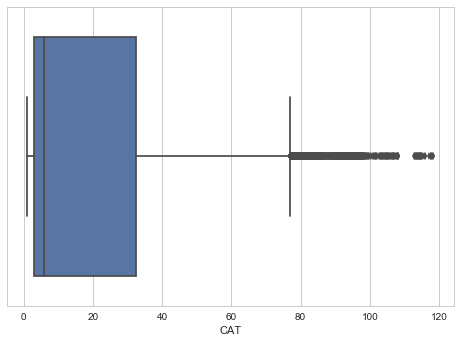

Please wait this will take awhile!
For different kernels seaborn is auto-selecting "silverman"


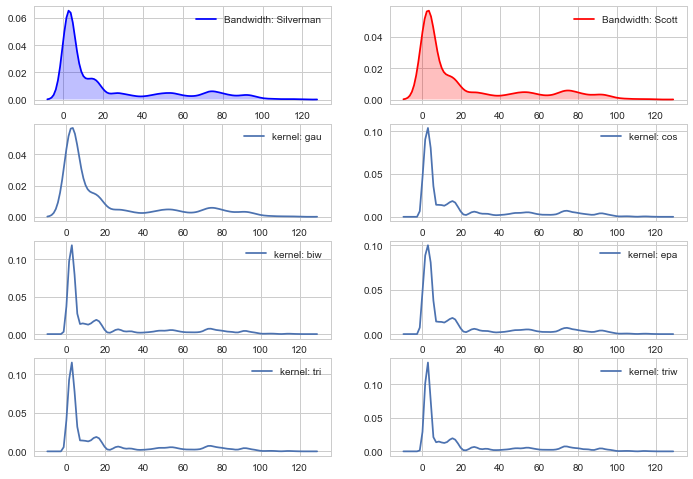

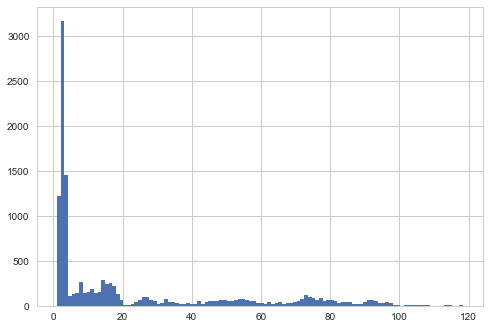

Choose a bandwidth:silverman
Choose a kernel:gau


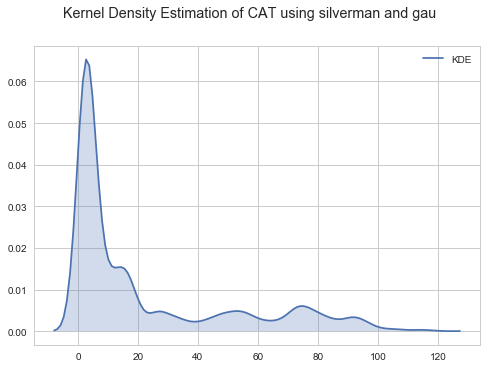

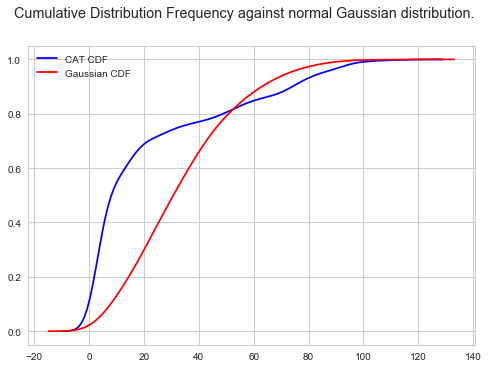

In [38]:
drawPlots(data['CAT'])

In [154]:
#sns.kdeplot?

Multi-dimensions / Bivariate Distributions
=========

Functions to create quick and simple plots to look at data to get familiar with it, you must specify X and Y values

This is obviously a quick and dirty creation and won't work for all data types

https://seaborn.pydata.org/tutorial/distributions.html

In [61]:
def multScat(variable1,variable2):
    df = pd.DataFrame(data, columns=[variable1.name, variable2.name])
    sns.kdeplot(df)
    return plt.show()

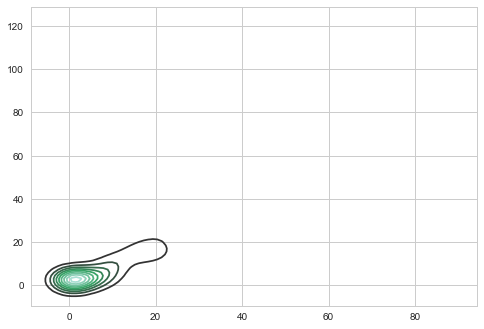

In [62]:
multScat(data['ED'],data['CAT'])

In [57]:
def joinScat(variable1,variable2):
    sns.jointplot(x=variable1.name, y=variable2.name, data=data)
    return plt.show(),plt.clf()

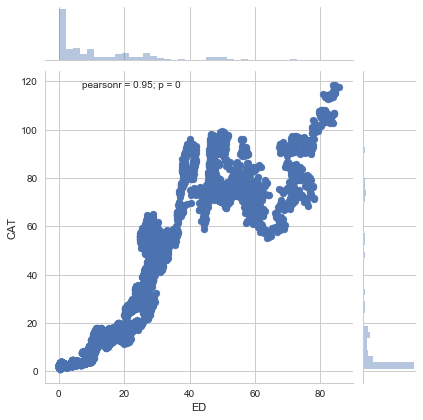

(None, None)

In [58]:
joinScat(data['ED'],data['CAT'])

In [59]:
def joinPlot(variable1,variable2):
    sns.jointplot(variable1.name,variable2.name,data,kind='kde')
    return plt.show(),plt.clf()

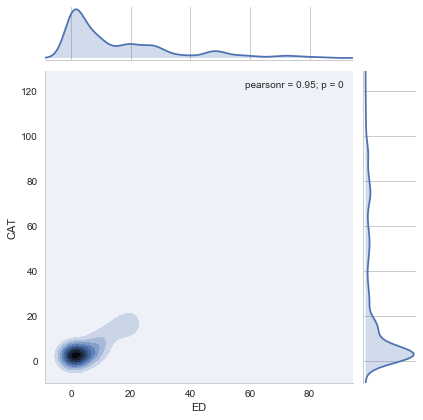

(None, None)

In [60]:
joinPlot(data['ED'],data['CAT'])

Scatterplot

In [64]:
def scatterData(variable1,variable2):   
    sns.jointplot(variable1,variable2)
    return plt.show()

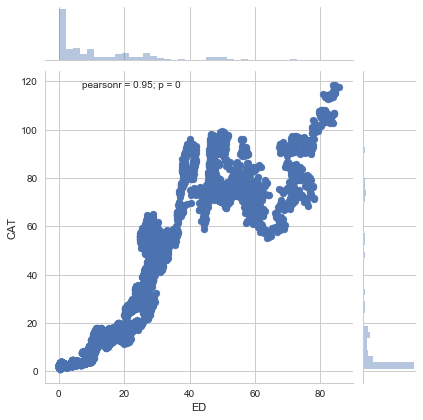

In [65]:
scatterData(data['ED'],data['CAT'])

In [ ]:
#http://danielhnyk.cz/fitting-distribution-histogram-using-python/

#from scipy import stats  
#import numpy as np  
#import matplotlib.pylab as plt

# create some normal random noisy data
#ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
#plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
#xt = plt.xticks()[0]  
#xmin, xmax = min(xt), max(xt)  
#lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
#m, s = stats.norm.fit(ser) # get mean and standard deviation  
#pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
#plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
#ag,bg,cg = stats.gamma.fit(ser)  
#pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
#plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
#ab,bb,cb,db = stats.beta.fit(ser)  
#pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
#plt.plot(lnspc, pdf_beta, label="Beta")

#plt.show()  

Create Train Test Split Sets
=================

In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

In [ ]:
train, validate, test = train_validate_test_split(data)

In [29]:
train.head()

,compiled from Yahoo! Finance data by Matt Borthwick,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
4959,1989-08-16,5.716818,0.004055,5.031669,17.644566,4.031823,12.224814,1.613857,3.686140,6.678162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2433,1979-08-20,0.582629,0.000886,1.779875,2.255044,3.085976,3.204419,0.640361,0.411199,1.078525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,1994-12-08,8.019994,0.006687,9.798035,9.410309,7.204891,18.179932,2.815533,4.877734,8.004892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3533,1983-12-23,1.774673,0.001364,2.232105,4.092962,2.812218,5.222898,0.929078,0.787282,1.294917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,1975-05-21,0.192693,0.000676,0.830961,1.007251,2.252830,3.004884,0.466390,0.219557,1.235479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
validate.head()

,compiled from Yahoo! Finance data by Matt Borthwick,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
3743,1984-10-23,2.260031,0.001322,2.240952,4.352026,1.929091,4.721930,1.254811,0.924228,1.388736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,1970-12-08,0.298382,0.000590,0.616219,1.865204,1.466338,1.699821,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10483,2011-07-15,41.408997,0.109183,84.036201,20.637098,90.968636,23.769562,20.612337,10.443295,30.917561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3417,1983-07-12,1.556483,0.001239,2.514229,3.830764,2.549673,4.478859,0.984600,0.663138,1.342090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,1974-08-28,0.108507,0.000603,0.681445,0.647247,1.661851,2.292612,0.444181,0.206510,0.958456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
test.head()

,compiled from Yahoo! Finance data by Matt Borthwick,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
3253,1982-11-16,1.228771,0.000968,1.974874,2.749567,2.416141,3.843326,0.710689,0.356846,1.271842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,1972-08-30,0.333559,0.000892,0.874245,2.005359,2.301708,1.945115,0.507106,0.328052,1.174834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4956,1989-08-11,5.743786,0.004003,4.997360,18.200296,4.079820,12.336802,1.628663,3.570111,6.530655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10084,2009-12-14,32.645664,1.087683,58.052616,8.074295,46.874596,20.316328,18.588736,7.244088,26.484386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,2008-01-14,30.552259,0.006220,63.849308,8.390159,50.458824,22.464033,24.839514,4.930448,38.538727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
